In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
df = pd.read_csv("../data/daily_summary.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
df = df.drop(['index', 'date', 's&p_%change'], axis=1)
# Drop the null rows
df = df.dropna()


# Select your features (columns)

In [6]:
df

,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral,s&p_up/down
0,17,4,0,5.855472,915.44,0.099388,522435,1118266,908,12,0,4,up
1,3,1,0,5.599524,156.98,-0.156560,227982,700580,163,2,0,1,up
2,1,0,0,6.650000,39.90,0.893916,36535,142625,32,1,0,0,down
3,5,0,0,5.826134,355.76,0.070050,193625,832596,351,4,0,1,up
4,2,0,0,5.873654,146.84,0.117570,69857,254719,144,2,0,0,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,27,6,0,5.663288,1729.56,-0.092796,616069,2462718,1799,15,3,7,down
987,8,0,0,5.668879,421.14,-0.087205,301467,1293019,437,6,0,1,up
988,37,5,0,5.512343,2379.17,-0.243741,646224,2554907,2529,18,4,10,down
989,26,1,0,5.583342,2050.85,-0.172742,681597,3209931,2118,16,2,8,up


In [8]:
# Set features. This will also be used as your x values.
selected_features = df.drop(['s&p_up/down'], axis=1)
selected_features.head()

,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral
0,17,4,0,5.855472,915.44,0.099388,522435,1118266,908,12,0,4
1,3,1,0,5.599524,156.98,-0.156560,227982,700580,163,2,0,1
2,1,0,0,6.650000,39.90,0.893916,36535,142625,32,1,0,0
3,5,0,0,5.826134,355.76,0.070050,193625,832596,351,4,0,1
4,2,0,0,5.873654,146.84,0.117570,69857,254719,144,2,0,0


# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
# pull out the output labels column or y values
labels = df['s&p_up/down']
print(labels.shape)
labels.head()

(991,)


0      up
1      up
2    down
3      up
4      up
Name: s&p_up/down, dtype: object

In [10]:
# Split the data in training and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.8, random_state=3 )

In [12]:
# Inspect training data
print(X_train.shape)
X_train.head()

(792, 12)


,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral
78,8,0,0,5.591898,508.96,-0.164186,126516,649797,529,5,1,2
109,4,0,0,5.858109,291.94,0.102025,37824,185193,294,3,1,0
266,4,0,0,5.402532,460.82,-0.353552,64421,299841,500,2,0,2
143,7,1,0,5.793910,420.04,0.037826,105400,423634,430,5,1,1
763,3,1,0,5.845970,138.25,0.089886,81531,362078,142,2,0,1


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

[0.04605263 0.         0.         0.39660046 0.05892623 0.39660046
 0.04725192 0.11538574 0.0579661  0.05617978 0.04166667 0.03389831]


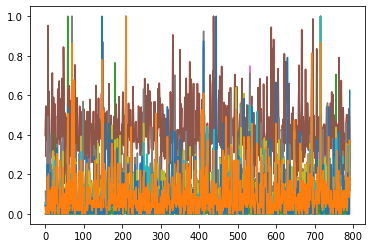

In [13]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

# Train the Model



In [9]:
# need to pick the setting anad rsearch

k: 1, Train/Test Score: 1.000/0.452
k: 3, Train/Test Score: 0.742/0.462
k: 5, Train/Test Score: 0.681/0.472
k: 7, Train/Test Score: 0.667/0.472
k: 9, Train/Test Score: 0.645/0.477
k: 11, Train/Test Score: 0.649/0.472
k: 13, Train/Test Score: 0.634/0.508
k: 15, Train/Test Score: 0.616/0.497
k: 17, Train/Test Score: 0.622/0.503
k: 19, Train/Test Score: 0.600/0.482


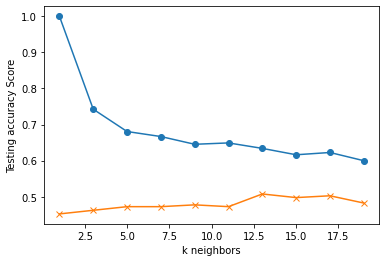

In [14]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [21]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11, leaf_size=20, p=1)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.5f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.46734


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid={'leaf_size': [20, 30, 40], 'n_neighbors' : [3, 5, 7, 9, 11, 13, 15],
'p' : [1, 2, 3, 4]}
grid = GridSearchCV(knn, param_grid, verbose=3)

# To get list of parameters you can tune
knn.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [18]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.484, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.572, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.481, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.456, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=1, score=0.506, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=2 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=2, score=0.465, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=2 ................................
[CV] .... leaf_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... leaf_size=20, n_neighbors=3, p=4, score=0.453, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=4, score=0.541, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=4, score=0.481, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=4, score=0.443, total=   0.0s
[CV] leaf_size=20, n_neighbors=3, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=3, p=4, score=0.506, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.472, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .... leaf_size=20, n_neighbors=5, p=1, score=0.566, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=1 ................................
[CV] .

[CV] .... leaf_size=20, n_neighbors=9, p=3, score=0.513, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=3 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=3, score=0.532, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=4, score=0.535, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=4, score=0.535, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=4, score=0.544, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=4, score=0.443, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=4 ................................
[CV] .... leaf_size=20, n_neighbors=9, p=4, score=0.532, total=   0.0s
[CV] leaf_size=20, n_neighbors=11, p=1 ...............................
[CV] .

[CV] ... leaf_size=20, n_neighbors=15, p=4, score=0.563, total=   0.0s
[CV] leaf_size=20, n_neighbors=15, p=4 ...............................
[CV] ... leaf_size=20, n_neighbors=15, p=4, score=0.494, total=   0.0s
[CV] leaf_size=20, n_neighbors=15, p=4 ...............................
[CV] ... leaf_size=20, n_neighbors=15, p=4, score=0.525, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=1, score=0.484, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=1, score=0.572, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=1, score=0.481, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=3, p=1, score=0.456, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=1 ................................
[CV] .

[CV] .... leaf_size=30, n_neighbors=7, p=4, score=0.528, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=4, score=0.551, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=4, score=0.494, total=   0.0s
[CV] leaf_size=30, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=30, n_neighbors=7, p=4, score=0.551, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=1, score=0.491, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=1, score=0.503, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=1 ................................
[CV] .... leaf_size=30, n_neighbors=9, p=1, score=0.538, total=   0.0s
[CV] leaf_size=30, n_neighbors=9, p=1 ................................
[CV] .

[CV] ... leaf_size=30, n_neighbors=15, p=2, score=0.541, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=2, score=0.513, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=2, score=0.513, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=2 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=2, score=0.506, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=3, score=0.459, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=3, score=0.547, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=3 ...............................
[CV] ... leaf_size=30, n_neighbors=15, p=3, score=0.557, total=   0.0s
[CV] leaf_size=30, n_neighbors=15, p=3 ...............................
[CV] .

[CV] .... leaf_size=40, n_neighbors=7, p=3, score=0.576, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=3, score=0.500, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=3 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=3, score=0.538, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=4, score=0.541, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=4, score=0.528, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=4, score=0.551, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=4 ................................
[CV] .... leaf_size=40, n_neighbors=7, p=4, score=0.494, total=   0.0s
[CV] leaf_size=40, n_neighbors=7, p=4 ................................
[CV] .

[CV] ... leaf_size=40, n_neighbors=13, p=3, score=0.481, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=3 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=3, score=0.532, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=4 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=4, score=0.478, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=4 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=4, score=0.566, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=4 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=4, score=0.563, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=4 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=4, score=0.500, total=   0.0s
[CV] leaf_size=40, n_neighbors=13, p=4 ...............................
[CV] ... leaf_size=40, n_neighbors=13, p=4, score=0.506, total=   0.0s
[CV] leaf_size=40, n_neighbors=15, p=1 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:    6.3s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2, 3, 4]},
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 20, 'n_neighbors': 11, 'p': 1}
0.5341453705915133


## Model Outcome
k=11 Test Acc: 0.46734

# Save the Model

In [20]:
# import joblib
# filename = 'model_2_randomforest_extratreeclassifer.h5'
# joblib.dump(clf, filename)

['model_2_randomforest_extratreeclassifer.h5']